In [13]:
import re

def count_matches_deletions_insertions(cigars):
    max_pos = 0  # maximum position across all CIGAR strings
    match_counts = []
    deletion_counts = []
    insertion_counts = []
    
    for cigar in cigars:
        pos = 0  # current position in the read
        matches = []
        deletions = []
        insertions = []
        
        # iterate over cigar operations
        for op in re.findall(r'(\d+)([MIDNSHPX=])', cigar):
            op_len, op_code = int(op[0]), op[1]
            
            if op_code in ['M', '=', 'X']:  # match or mismatch
                matches.extend([pos+i for i in range(op_len)])
                pos += op_len
            elif op_code in ['D', 'N']:  # deletion
                deletions.extend([pos+i for i in range(op_len)])
                pos += op_len
            elif op_code == 'I':  # insertion
                insertions.extend([pos+i for i in range(op_len)])
            else:  # handle other operations if needed
                pass
        
        max_pos = max(max_pos, max(matches + deletions + insertions))
        
        match_counts.append(matches)
        deletion_counts.append(deletions)
        insertion_counts.append(insertions)
    
    # initialize count arrays
    match_count_array = [0] * (max_pos + 1)
    deletion_count_array = [0] * (max_pos + 1)
    insertion_count_array = [0] * (max_pos + 1)
    
    # update counts
    for matches in match_counts:
        for pos in matches:
            match_count_array[pos] += 1
    
    for deletions in deletion_counts:
        for pos in deletions:
            deletion_count_array[pos] += 1
    
    for insertions in insertion_counts:
        for pos in insertions:
            insertion_count_array[pos] += 1
    
    return match_count_array, deletion_count_array, insertion_count_array


cigars = ['10M2D1I', '5M2I3M1D1M']
match_counts, deletion_counts, insertion_counts = count_matches_deletions_insertions(cigars)

print('Match counts:', match_counts)
print('Deletion counts:', deletion_counts)
print('Insertion counts:', insertion_counts)



Match counts: [2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0]
Deletion counts: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]
Insertion counts: [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]


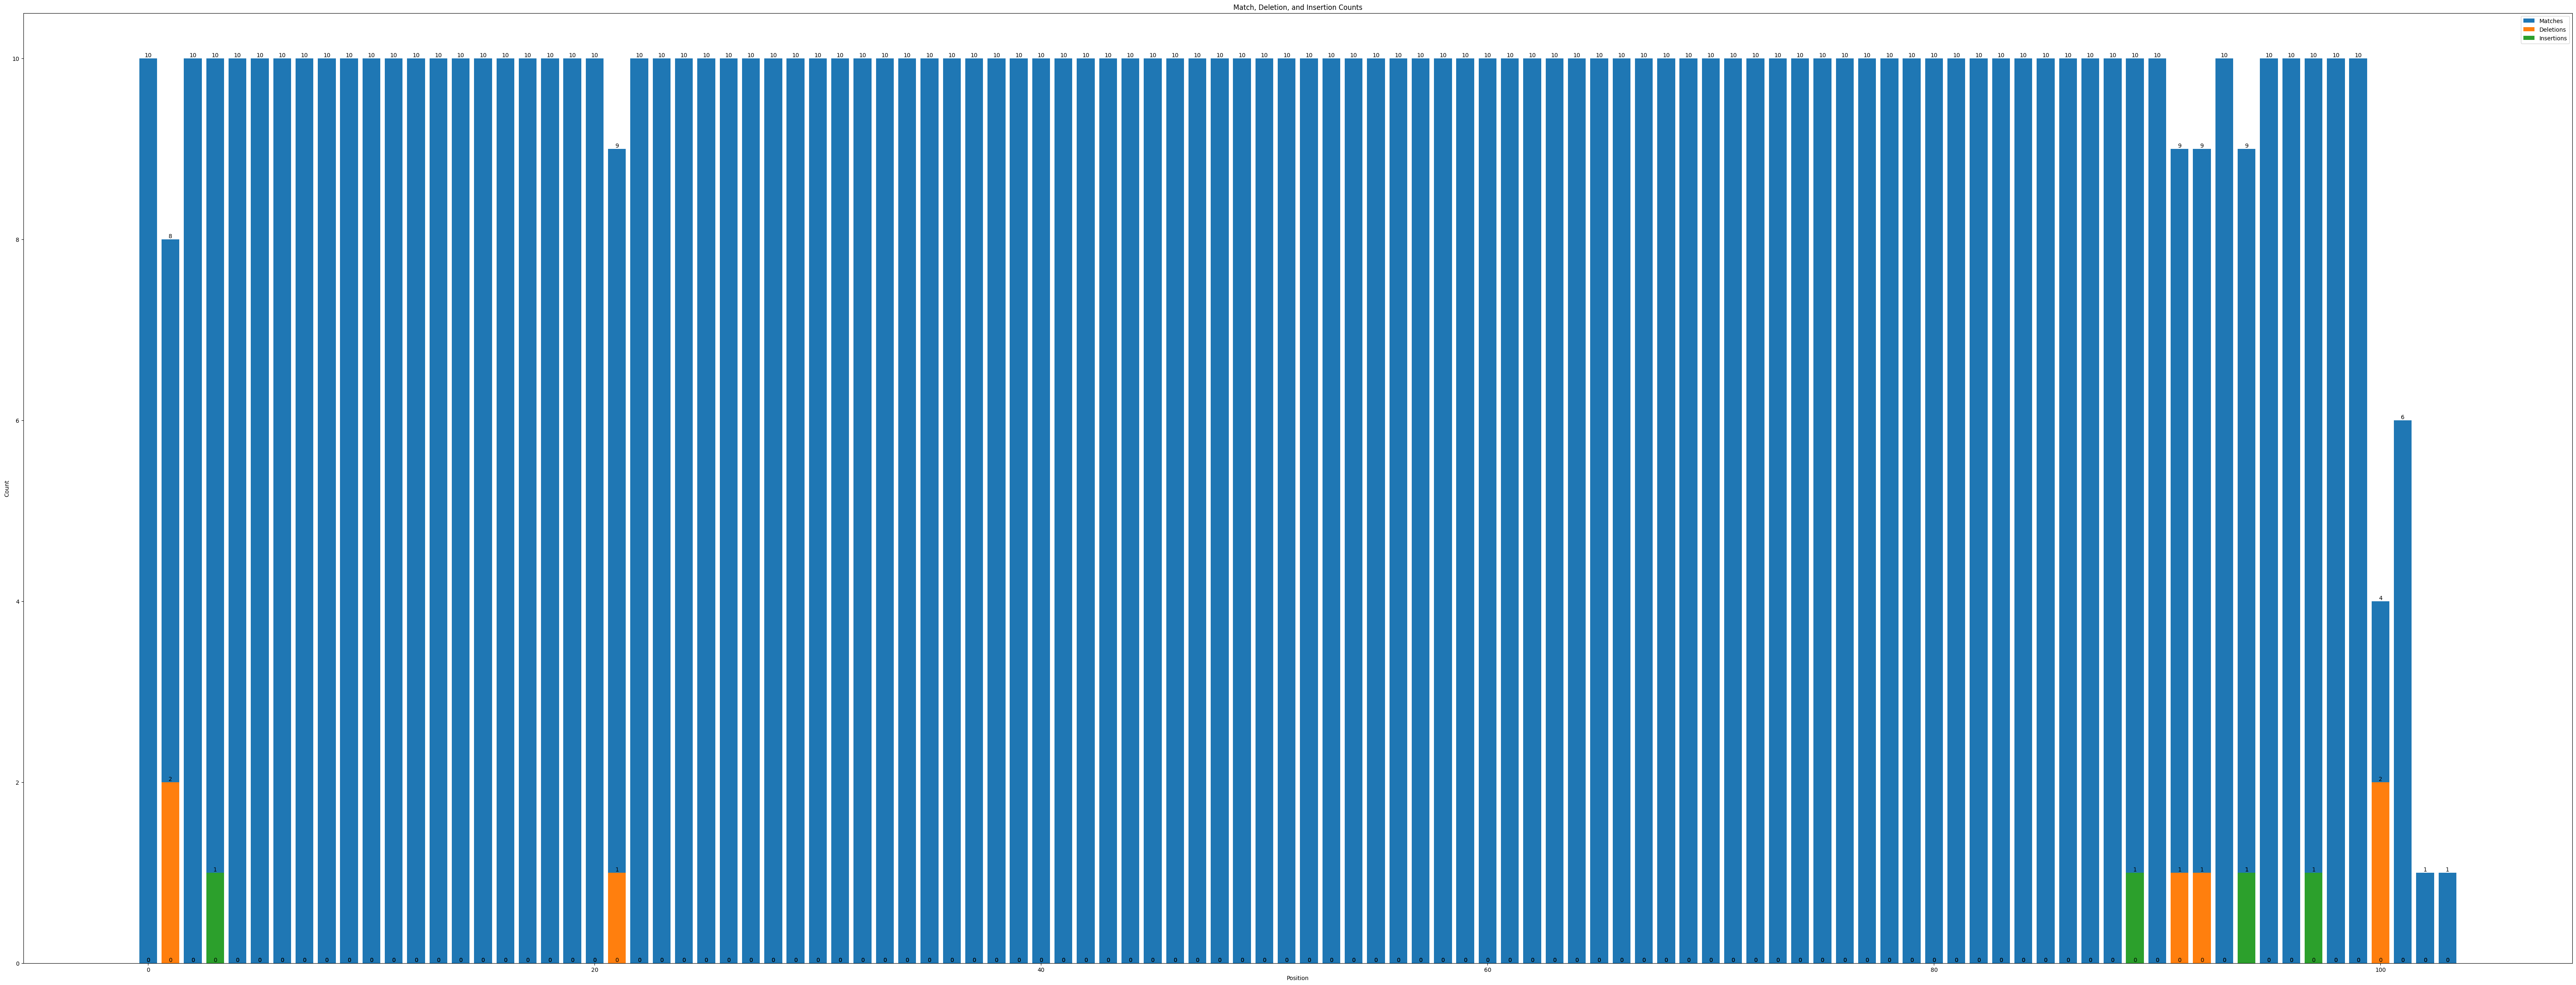

Match counts: 104
Deletion counts: 104
Insertion counts: 104


In [35]:
import matplotlib.pyplot as plt

def plot_counts(match_counts, deletion_counts, insertion_counts):
    positions = range(len(match_counts))
    plt.figure(figsize=(80, 30))
    plt.bar(positions, match_counts, label='Matches', alpha=1)
    plt.bar(positions, deletion_counts, label='Deletions', alpha=1)
    plt.bar(positions, insertion_counts, label='Insertions', alpha=1)

    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.title('Match, Deletion, and Insertion Counts')
    plt.legend()
    # Add count values on top of each bar
    for i, count in enumerate(match_counts):
        plt.text(i, count, str(count), ha='center', va='bottom')
    for i, count in enumerate(deletion_counts):
        plt.text(i, count, str(count), ha='center', va='bottom')
    for i, count in enumerate(insertion_counts):
        plt.text(i, count, str(count), ha='center', va='bottom')
    plt.show()
def statistic_matrix(filename):
    cigars = []
    with open(filename, 'r') as file:
        for line in file:
            line = line.rstrip('\n')
            cigars.append(line)
    # print(cigars)
    match_counts, deletion_counts, insertion_counts = count_matches_deletions_insertions(cigars)
    plot_counts(match_counts, deletion_counts, insertion_counts)
    print('Match counts:', len(match_counts))
    print('Deletion counts:', len(deletion_counts))
    print('Insertion counts:', len(insertion_counts))

statistic_matrix("test.txt")